In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import GPy

# 1. Гауссовский процесс на временном ряде с возрастающей дисперсией

### Данные - временной ряд с возрастающей дисперсией

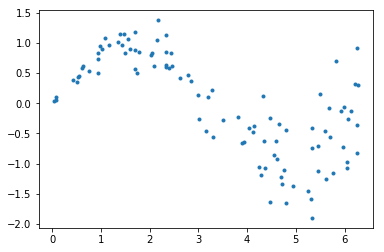

In [2]:
N = 100
x = np.random.uniform(0, 2 * np.pi, size=N)
y = np.zeros(N, np.float64)
for i in range(N):
    y[i] = np.sin(x[i]) + np.random.normal(scale=0.01 + 0.1 * x[i])

plt.plot(x, y, '.')

### Построим гауссовский процесс

 C:\Users\ktsyganov\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


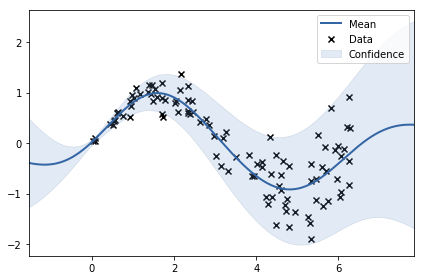

In [3]:
kernel = GPy.kern.RBF(1) + GPy.kern.White(1) * GPy.kern.Linear(1)
model = GPy.models.GPRegression(x.reshape(-1, 1), y.reshape(-1, 1), kernel)
model.optimize()
fig = model.plot()

Все выглядит неплохо. Теперь попробуем сделать тоже самое на временном ряде с убывающей дисперсией.

# 2. Гауссовский процесс на временном ряде с убывающей дисперсией

### Данные

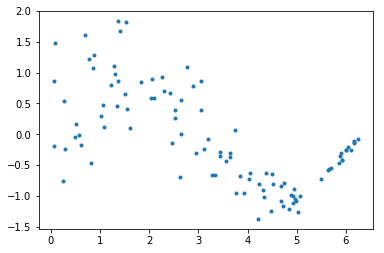

In [4]:
N = 100
x = np.random.uniform(0, 2 * np.pi, size=N)
y = np.zeros(N, np.float64)
for i in range(N):
    y[i] = np.sin(x[i]) + np.random.normal(scale=0.8 - 0.125 * x[i])

plt.plot(x, y, '.')

### Построим гауссовский процесс как в первом случае

 C:\Users\ktsyganov\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


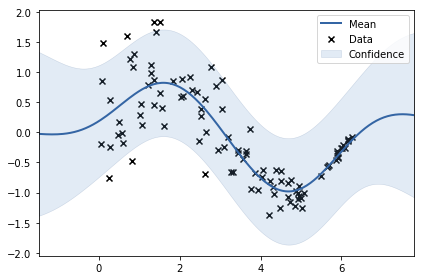

In [5]:
kernel = GPy.kern.RBF(1) + GPy.kern.White(1) * GPy.kern.Linear(1)
model = GPy.models.GPRegression(x.reshape(-1, 1), y.reshape(-1, 1), kernel)
model.optimize()
model.plot()

Видим проблему - доверительные интервалы оценены неправильно. Почему?

### Решение

Посмотрим на то, как реализовано линейное ядро Linear в документации GPy: https://gpy.readthedocs.io/en/deploy/GPy.kern.src.html#module-GPy.kern.src.linear

Оно выглядит как $<x, y>$  - получатся, что увеличении $x$ (и фикс. $y$) его значение будет возрастать.

 C:\Users\ktsyganov\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


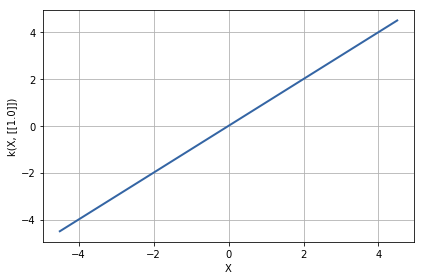

In [6]:
GPy.kern.Linear(1).plot()
plt.grid()

В частности, значение при $x=6$ будет больше, чем при $x=0$. Нам же нужно наоборот - чтобы при увеличении $x=6$ значение было меньше, чем при $x=0$. Для этого построим ГП не для $x$, а для $(x-6)$ - этим преобразованием мы неявно сместим ядро. Тогда у нас при приближении $(x-6)$ к нулю значение ядра будет стремиться к нулю.

 C:\Users\ktsyganov\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


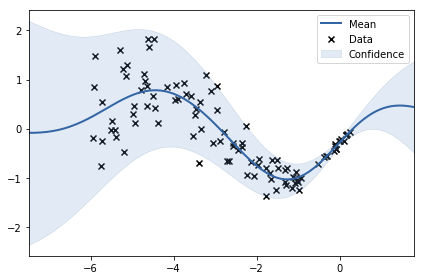

In [7]:
kernel = GPy.kern.RBF(1) + GPy.kern.White(1) * GPy.kern.Linear(1)
model = GPy.models.GPRegression(x.reshape(-1, 1)-6, y.reshape(-1, 1), kernel)
model.optimize()
fig = model.plot()